## Imports

In [33]:
%load_ext autoreload
%autoreload 2
import util
import engutil
from scipy import io
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Spectrum plotting

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Sampling frequency: 96000
40.56134488009378
Detected Fundamental: 40.00 Hz
THD is 0.675 %


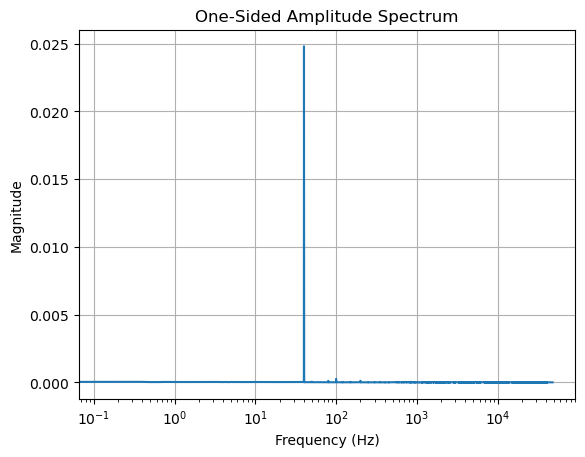

(2.0, 2.075)

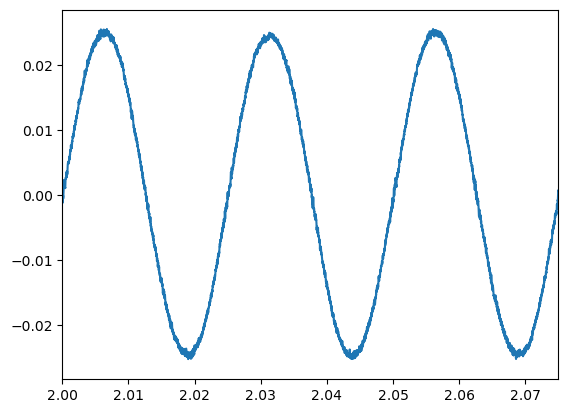

In [116]:
%load_ext autoreload
%autoreload 2
import util
# path = "/Users/aske-/Documents/DTU/Kandidat/3. semester/Non linear transducers/puretone_f1_20Hz_f2_NoneHz_/puretone_f1_20Hz_f2_NoneHz_"

# data = io.loadmat(path + "/puretone_f1_20Hz_f2_NoneHz_6Vrms.mat")

path = "/Users/aske-/Documents/DTU/Kandidat/3. semester/Non linear transducers/puretone_f1_40Hz_f2_NoneHz_/puretone_f1_40Hz_f2_NoneHz_"

data = io.loadmat(path + "/puretone_f1_40Hz_f2_NoneHz_0.15Vrms.mat")

fs = data['sample_rate'][0][0]

print(f"Sampling frequency: {fs}")

u = np.squeeze(data['voltage'])
i = np.squeeze(data['current'])
d = np.squeeze(data['displacement'])
v = np.squeeze(data['velocity'])

#print(util.rms(u))
# print(len(d)/fs)
print(util.vel_2_spl(v, 4e-2, 40))

t = np.linspace(0, 8, 8*fs)

THD, THD_data = util.thd_r(v, fs)

print(f"THD is {THD * 100:.3f} %")

util.plot_one_sided_spectrum(v, fs)

plt.figure()
plt.plot(t, v)
plt.xlim([2,2 + 3*1/40])
